# **D√©termination du meilleur mod√®le**

Nous avons pr√©-√©valu√© 3 types de mod√®les, r√©gression logistique, for√™t al√©atoire et LightGBM, sur la base d'un petit √©chantillon.

Il s'agit √† pr√©sent de passer √† l'√©chelle, avec d'une part un √©chantillon plus important, et une recherche en grille des meilleures configurations.

Il ne s'agit pas seulement de faire jouer les hyper-param√®tres de la LGBM, qui est la meilleure candidate pour la haute performance, mais de jouer √©galement sur les param√®tres li√©s √† la pr√©paration des donn√©es, l'√©chantillonnage √©quilibr√© et la mise √† l'√©chelle des donn√©es.

Nous n'utiliserons pas la pipeline de SKL, √©tant donn√© que notre fonction `kfold_train_and_eval_model` en est d√©j√† une.

**Note du 5 mai** - Dans l'obligation de livrer sans disposer d'un temps raisonnable pour couvrir l'ensemble des demandes, nous nous voyons dans l'obligation de passer aux √©tapes aval sans avoir pu mener une v√©ritable recherche en grille avec variation des combinaison d'hyperparam√®tres, ni sans avoir √©galement fait varier les param√®tres de pr√©-traitement des donn√©es, alors que le framework pour le faire est en place. Ce n'est donc pas une faute de conception ou de m√©thodologie, mais un manque de moyens allou√©s pour r√©aliser cette strat√©gie.

Nous nous contentons donc ici de d√©rouler la pipeline d'entrainement et de mesure des performances pr√©dictives √©labor√©e dans les sections pr√©c√©dentes et en particulier dans la section `kfold_train_and_eval_model_v2`.

Ce que nous faisons varier :
1. Les 3 mod√®les, √† param√®tres fixes, en anticipant que la LightGBM donnera les meilleurs r√©sultats.
2. Les tailles des √©chantillons d'entrainement : 
    * `_10k` : √©chantillon de $10\,000$ individus (3.25\,\%$).
    * `_100k` : √©chantillon de $100\,000$ individus (32.5\,\%$).
    * `_50pcts` : √©chantillon de $50\,\%$ de la population ($153\,756$ individus).
    * `_75pcts` : √©chantillon de $75\,\%$ de la population ($230\,633$ individus).
    * `_85pcts` : √©chantillon de $85\,\%$ de la population ($261\,384$ individus).
    * `_95pcts` : √©chantillon de $95\,\%$ de la population ($292\,135$ individus).
3. les seuils de pr√©diction des cas positifs : 50 %, 45 %, 40 %, 35 %

Pour des raisons pratiques, nous divisons cette √©valuation en 3 sections principales, une par type de mod√®le, puis en sections secondaires, une par taille d'√©chantillon.

Les d√©tails des √©tapes ayant √©t√© explicit√©s plus hauts, nous nous contentons ici du code, dense, et des rapports g√©n√©r√©s qui sont suffisamment explicites. Quelques commentaires viendront compl√©ter ici et l√† les r√©sultats remarquables observables dans les rapports.

Pour satisfaire l'une des exigences pl√©thoriques du projet, les exp√©riences men√©es ci-apr√®s seront enregistr√©es dans une instance `mlflow` (un dossier `mlruns/` local qui fera partie du livrable). Notons que cela nous oblige de quitter Python 3.11 et ses performances amlior√©es pour un retour √† Python 3.10.

# √Ä ex√©cuter avant de d√©marrer

Fixe la localisation du dossier `mlruns/` dans le sous dossier `tmp/` du projet.

A d√©faut, le lancement depuis ce notebook va cr√©er un dossier `mlruns/` comme sous-dossier du dossier parent, donc dans le dossier `notebooks/experiments`.

In [ ]:
import mlflow
from home_credit.load import get_mlflow_dir
print("default `mlruns/`:", mlflow.get_tracking_uri())
mlflow.set_tracking_uri("file://" + get_mlflow_dir())
print("this project `mlruns/`:", mlflow.get_tracking_uri())

default `mlruns/`: file:///c:/Users/franc/Projects/pepper_credit_scoring_tool/notebooks/experiments/mlruns
this project `mlruns/`: file://C:\Users\franc\Projects\pepper_credit_scoring_tool\tmp\mlruns


Pour rappel, pour visualiser dans l'UI les enregistrements de mod√®les et d'exp√©riences dans mlflow :

Depuis le terminal, soit se d√©placer jusqu'au sous-dossier `tmp/` du projet :

```sh
$ py3105 -m mlflow ui
```

Soit, de n'importe o√π :

```sh
$ py3105 -m mlflow ui --backend-store-uri <path_to_mlruns>
```

Une fois lanc√©, s'il ne rencontre pas de probl√®me au d√©marrage, il indique √† quelle URL:port on peut y acc√©der depuis un navigateur, en l'occurrence, l'adresse est celle g√©n√©rique de `localhost` :

```sh
INFO:waitress:Serving on http://127.0.0.1:5000
```

# R√©gression logistique

## **`50p`**

default `mlruns/`: file://C:\Users\franc\Projects\pepper_credit_scoring_tool\tmp\mlruns
this project `mlruns/`: file://C:\Users\franc\Projects\pepper_credit_scoring_tool\tmp\mlruns


2023/05/06 14:23:50 INFO mlflow.tracking.fluent: Experiment with name 'LogisticRegression_train_baseline_50pcts' does not exist. Creating a new experiment.



Starting train and eval of:
Labeled dataset of shape: (153756, 790)
Features set of shape: (153756, 788)

With:
Classifier: 


LogisticRegression(C=0.0001, random_state=42)

Loss function: 


{'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

Eval metrics: 


{'F2': <function home_credit.best_model_search.<lambda>(y, y_pred)>,
 'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

On 5 KFolds: 

Resampling
Sampler: 


RandomUnderSampler(random_state=42)

Original dataset shape: Counter({0.0: 141324, 1.0: 12432})
Resampled dataset shape: Counter({0.0: 12432, 1.0: 12432})
Data shape: (24864, 788)

Evaluate the 1-th fold (on 5)
Fold  0 F2: 0.647092
Fold  0 AUC: 0.691855

Evaluate the 2-th fold (on 5)
Fold  1 F2: 0.645044
Fold  1 AUC: 0.687888

Evaluate the 3-th fold (on 5)
Fold  2 F2: 0.644187
Fold  2 AUC: 0.685698

Evaluate the 4-th fold (on 5)
Fold  3 F2: 0.641015
Fold  3 AUC: 0.684159

Evaluate the 5-th fold (on 5)
Fold  4 F2: 0.641322
Fold  4 AUC: 0.692186
Full F2: 0.643725
Full AUC: 0.688243
Train time (min.): 1.0

Post train eval with threshold of 45.0 %
X : shape (307511, 788)	y class counts : (array([0., 1.]), array([282686,  24825], dtype=int64))
Xs : shape (153756, 788)	ys class counts : (array([0., 1.]), array([141324,  12432], dtype=int64))
Xrs : shape (24864, 788)	yrs class counts : (array([0., 1.]), array([12432, 12432], dtype=int64))
Xv : shape (153755, 788)	yv class counts : (array([0., 1.]), array([141362,  12393], dtype=

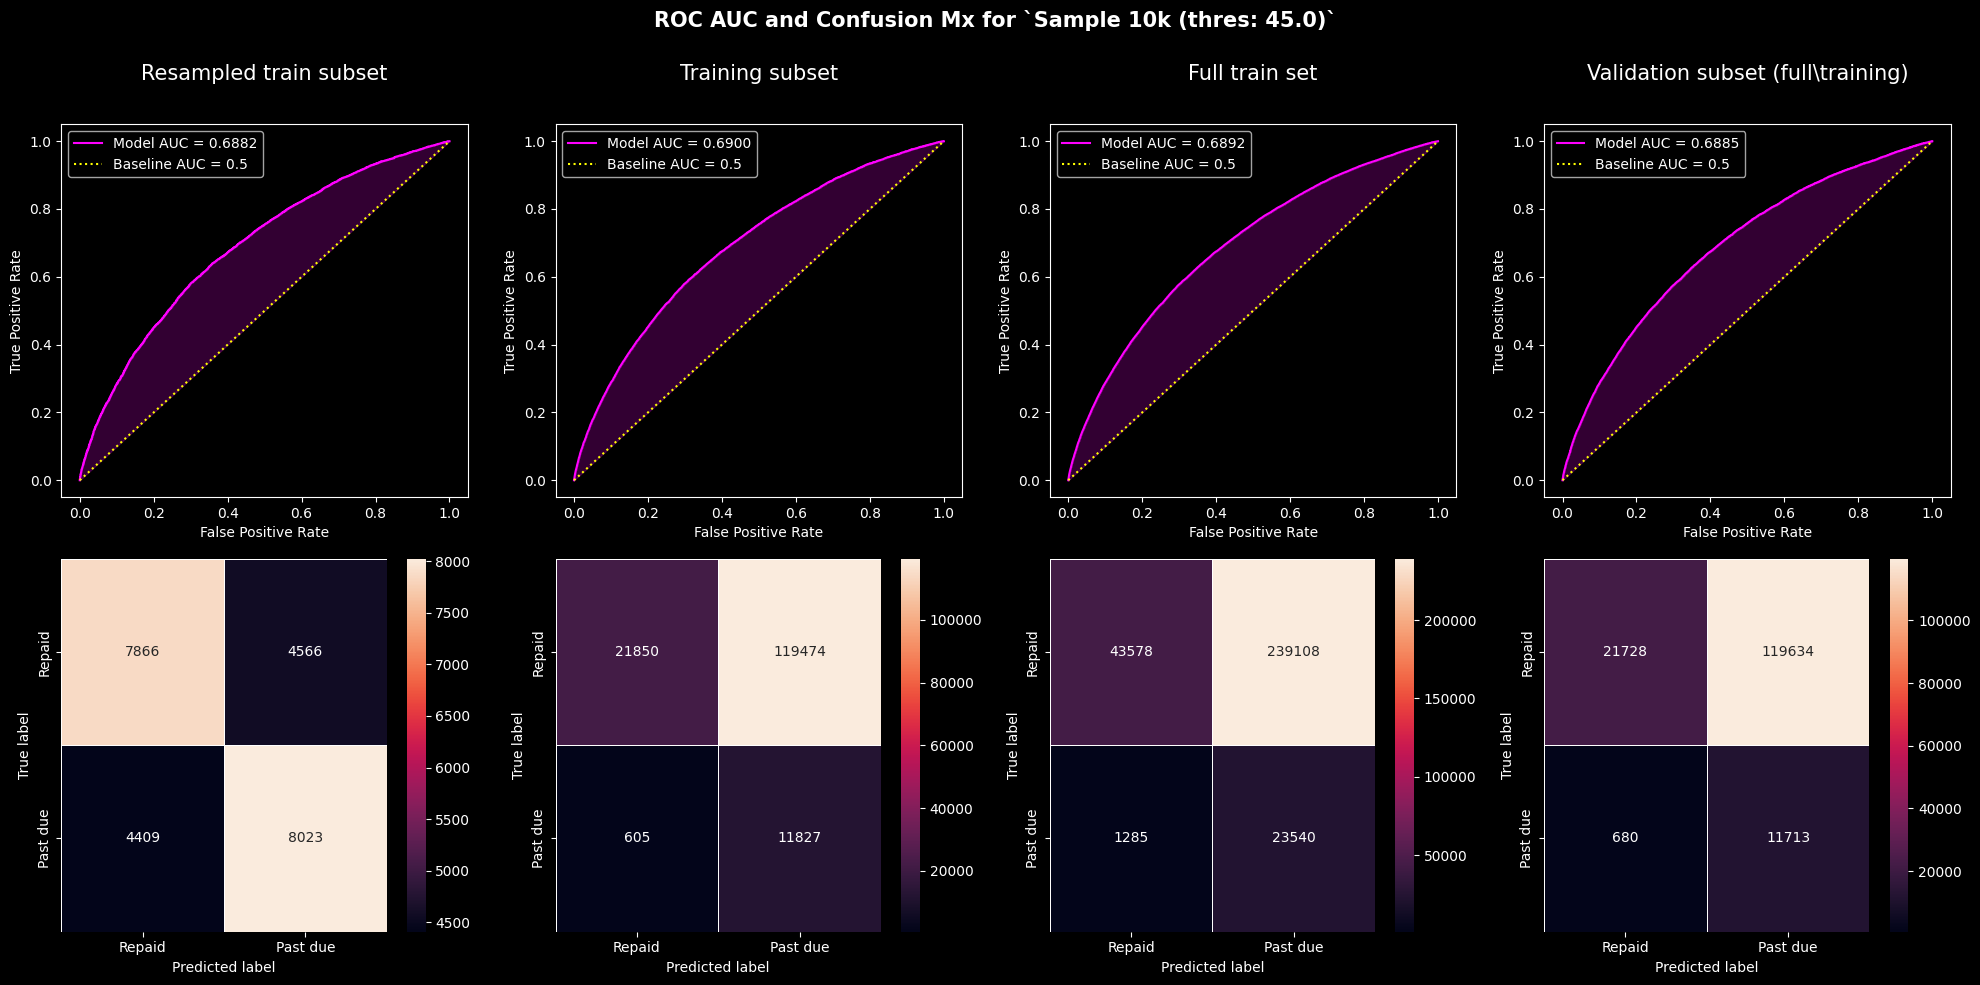


Validation set metrics
ROC AUC: 0.6884684595786571
Accuracy: 0.2174953660043576
ARI: -0.052512866504493064
Jaccard Index: 0.12201671841762476
Precision: 0.2174953660043576
Recall: 0.2174953660043576
F1: 0.2174953660043576
F2: 0.2174953660043576
F4: 0.2174953660043576
F8: 0.2174953660043576
F16: 0.2174953660043576

Undersampled validation set metrics
Original dataset shape Counter({0.0: 141362, 1.0: 12393})
Resampled dataset shape Counter({0.0: 12393, 1.0: 12393})
ROC AUC: 0.686434068151416
Accuracy: 0.550956184943113
ARI: 0.010371017901365603
Jaccard Index: 0.3802205145339125
Precision: 0.550956184943113
Recall: 0.550956184943113
F1: 0.550956184943113
F2: 0.550956184943113
F4: 0.550956184943113
F8: 0.550956184943113
F16: 0.550956184943113


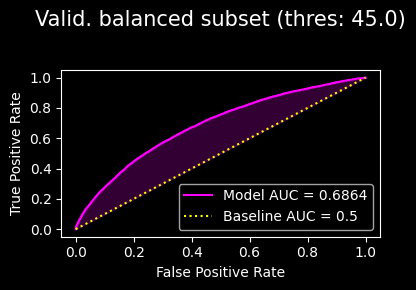

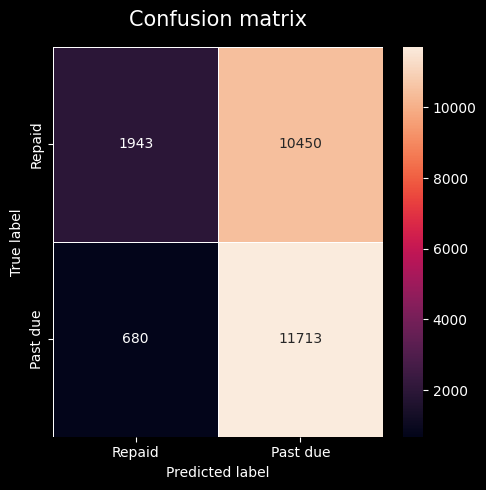

45 % exp res: AUC (0.686434068151416), FNR (0.34997426659804426), FPR (0.8921710919491164)

Post train eval with threshold of 40.0 %
X : shape (307511, 788)	y class counts : (array([0., 1.]), array([282686,  24825], dtype=int64))
Xs : shape (153756, 788)	ys class counts : (array([0., 1.]), array([141324,  12432], dtype=int64))
Xrs : shape (24864, 788)	yrs class counts : (array([0., 1.]), array([12432, 12432], dtype=int64))
Xv : shape (153755, 788)	yv class counts : (array([0., 1.]), array([141362,  12393], dtype=int64))


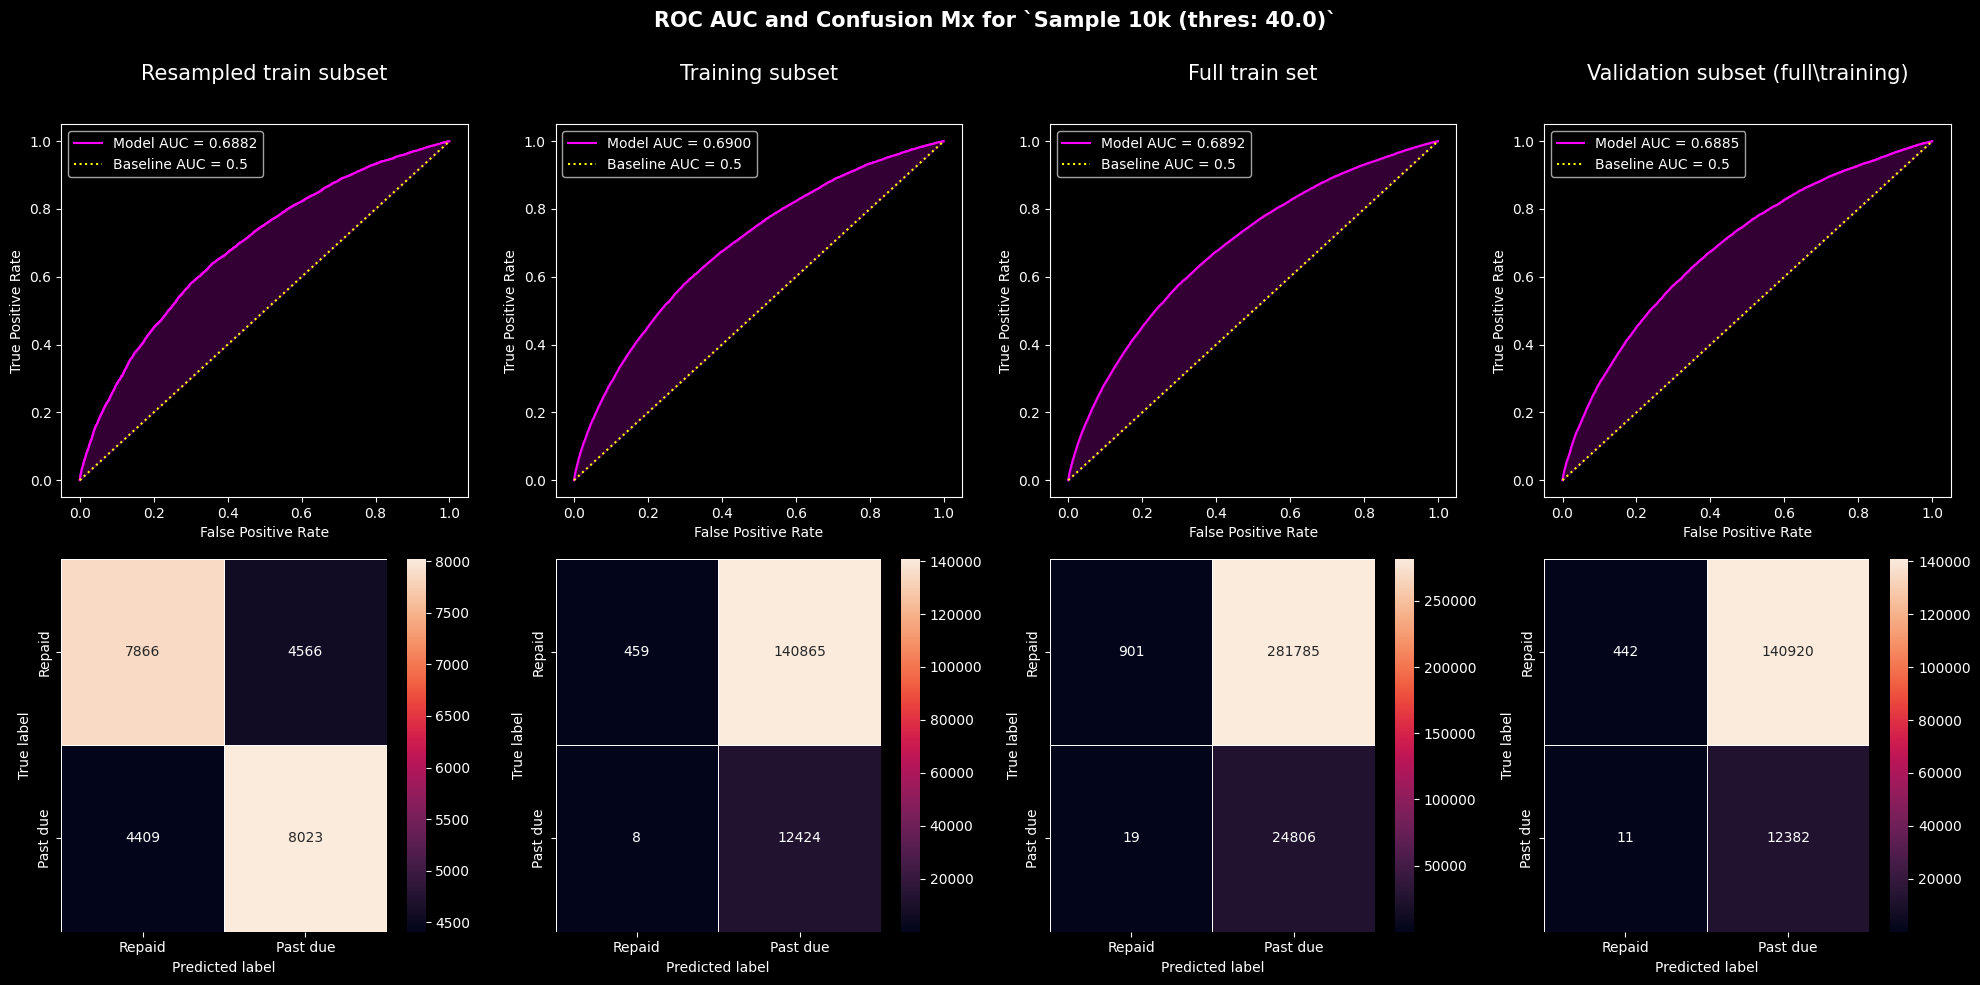


Validation set metrics
ROC AUC: 0.6884684595786571
Accuracy: 0.08340541770999317
ARI: -0.003631511686791561
Jaccard Index: 0.04351750676991781
Precision: 0.08340541770999317
Recall: 0.08340541770999317
F1: 0.08340541770999317
F2: 0.08340541770999317
F4: 0.08340541770999317
F8: 0.08340541770999317
F16: 0.08340541770999317

Undersampled validation set metrics
Original dataset shape Counter({0.0: 141362, 1.0: 12393})
Resampled dataset shape Counter({0.0: 12393, 1.0: 12393})
ROC AUC: 0.686434068151416
Accuracy: 0.5008875978374889
ARI: 2.8653339224595924e-06
Jaccard Index: 0.33412277632747533
Precision: 0.5008875978374889
Recall: 0.5008875978374889
F1: 0.5008875978374889
F2: 0.5008875978374889
F4: 0.5008875978374889
F8: 0.5008875978374889
F16: 0.5008875978374889


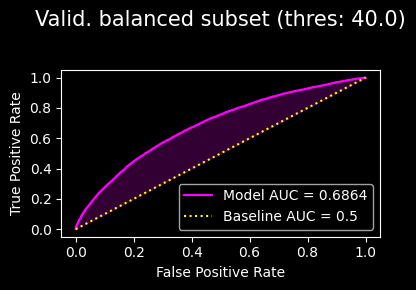

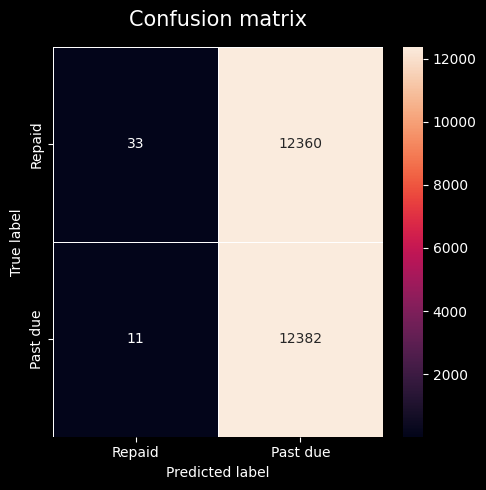

40 % exp res: AUC (0.686434068151416), FNR (0.3333333333333333), FPR (0.9982232272653853)

Post train eval with threshold of 35.0 %
X : shape (307511, 788)	y class counts : (array([0., 1.]), array([282686,  24825], dtype=int64))
Xs : shape (153756, 788)	ys class counts : (array([0., 1.]), array([141324,  12432], dtype=int64))
Xrs : shape (24864, 788)	yrs class counts : (array([0., 1.]), array([12432, 12432], dtype=int64))
Xv : shape (153755, 788)	yv class counts : (array([0., 1.]), array([141362,  12393], dtype=int64))


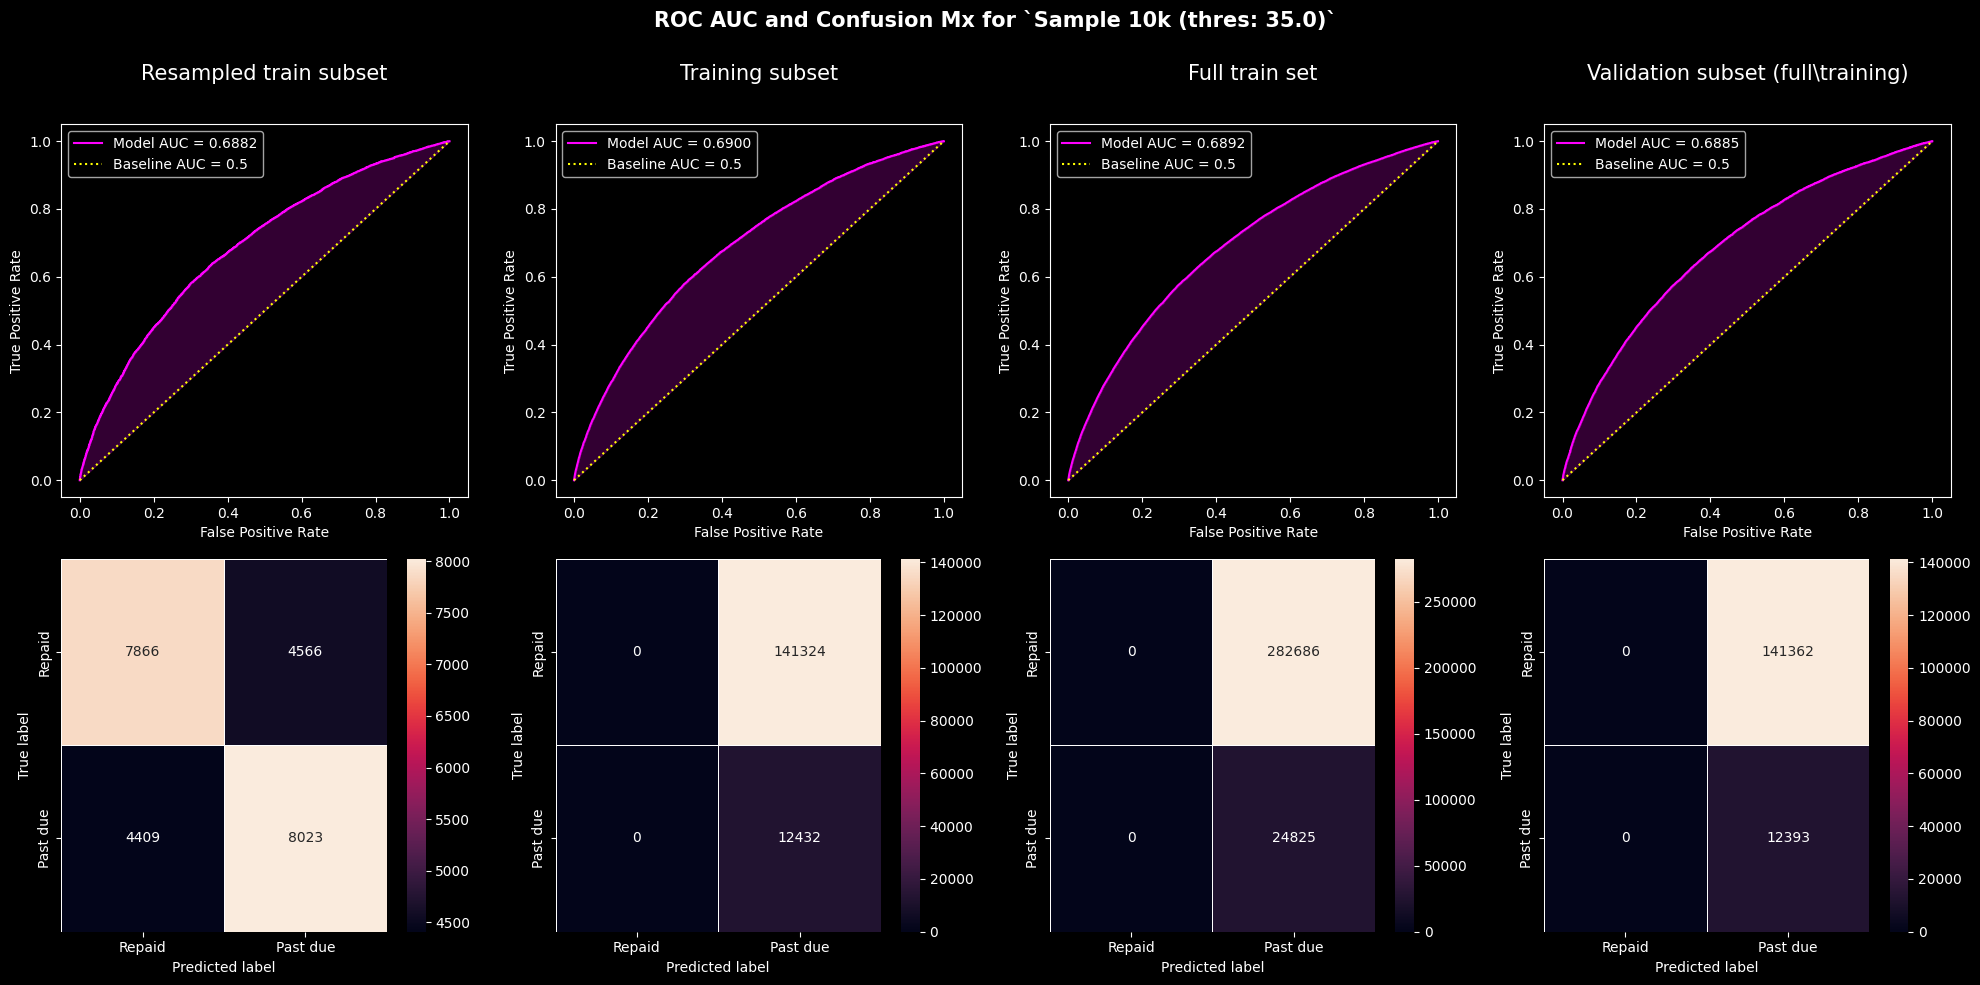


Validation set metrics
ROC AUC: 0.6884684595786571
Accuracy: 0.08060225683717602
ARI: 0.0
Jaccard Index: 0.04199351443664716
Precision: 0.08060225683717602
Recall: 0.08060225683717602
F1: 0.08060225683717602
F2: 0.080602256837176
F4: 0.08060225683717602
F8: 0.08060225683717602
F16: 0.08060225683717602

Undersampled validation set metrics
Original dataset shape Counter({0.0: 141362, 1.0: 12393})
Resampled dataset shape Counter({0.0: 12393, 1.0: 12393})
ROC AUC: 0.686434068151416
Accuracy: 0.5
ARI: 0.0
Jaccard Index: 0.3333333333333333
Precision: 0.5
Recall: 0.5
F1: 0.5
F2: 0.5
F4: 0.5
F8: 0.5
F16: 0.5


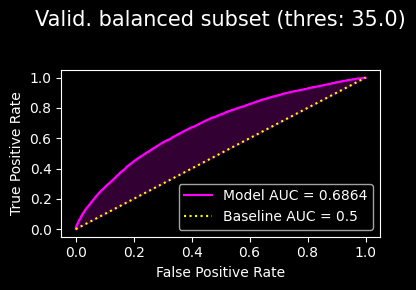

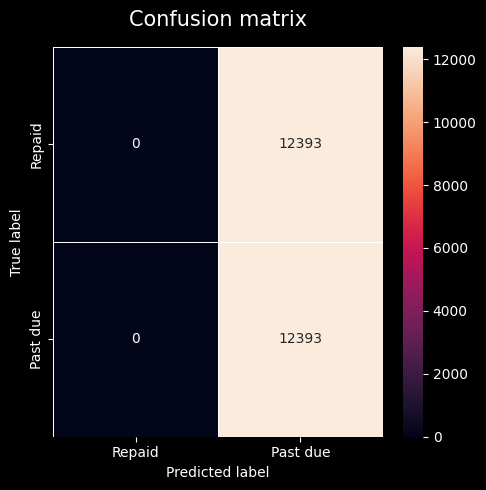

C:\Users\franc\Projects\pepper_credit_scoring_tool\modules\home_credit\mlflow_tracking.py:83: RuntimeWarning: invalid value encountered in longlong_scalars
  fnr, fpr = fn / tn, fp / tp


35 % exp res: AUC (0.686434068151416), FNR (nan), FPR (1.0)
Mlflow run (64e825c4aee04e40b8f129c8fd123849) completed


In [ ]:
from sklearn import linear_model
from home_credit.mlflow_tracking import do_first_experiment

run_id = do_first_experiment(
    trainset_name="train_baseline_50p",
    clf=linear_model.LogisticRegression(C=1e-4, random_state=42)
)
print(f"Mlflow run ({run_id}) completed")